In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from nltk.stem.snowball import SnowballStemmer
import string
from nltk.stem import PorterStemmer

In [2]:
raw_text=''
for line in open(r'C:\Users\74716\Documents\UN\all_txt.txt', 'r',encoding='utf8').readlines():    
        raw_text += line

In [3]:
corpus=[]
for line in open(r'C:\Users\74716\Documents\UN\all_txt.txt', 'r',encoding='utf8').readlines():   
        corpus.append(line)

In [16]:
stopwords=nltk.corpus.stopwords.words('english')
stemmer = SnowballStemmer('english')

In [18]:
def get_tokens(text):
    lowers = text.lower()
    #remove the punctuation using the character deletion step of translate
    translator = str.maketrans("","",string.punctuation) 
    new_text = text.translate(translator)   
    tokens = nltk.word_tokenize(new_text)
    return tokens

In [21]:
ps = PorterStemmer()
porter =nltk.PorterStemmer()
clean_text=[]
for i in range(len(corpus)):
    words_token= get_tokens(corpus[i])
    #mystopwords = stopwords.words('english')
    filtered_sentences = [porter.stem(w) for w in words_token if w.isalpha() if w not in stopwords]
    clean_sentence=' '.join(filtered_sentences)
    clean_text.append(clean_sentence)

In [22]:
def tokenize_and_stem(text):
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens=[]
    for token in tokens:
        if re.search('[a-zA-Z]',token):
            filtered_tokens.append(token)
    stems=[stemmer.stem(t) for t in filtered_tokens]
    return stems

In [23]:
def tokenize_only(text):
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens=[]
    for token in tokens:
        if re.search('[a-zA-Z]',token):
            filtered_tokens.append(token)
    return filtered_tokens

In [24]:
totalvocab_stemmed = []
totalvocab_tokenized = []

allwords_stemmed = tokenize_and_stem(raw_text)
totalvocab_stemmed.extend(allwords_stemmed)
    
allwords_tokenized = tokenize_only(raw_text)
totalvocab_tokenized.extend(allwords_tokenized)

In [25]:
vocab_frame=pd.DataFrame({'word':totalvocab_tokenized},index=totalvocab_stemmed)
print('there are '+ str(vocab_frame.shape[0])+' itmes in vocab_frame')

there are 598110 itmes in vocab_frame


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.9,min_df=20,stop_words='english',use_idf=True, tokenizer=tokenize_and_stem,ngram_range=(1,3))

In [45]:
%time tfidf_matrix=tfidf_vectorizer.fit_transform(corpus)

Wall time: 1min 13s


In [46]:
print(tfidf_matrix.shape)

(27297, 2884)


In [47]:
terms = tfidf_vectorizer.get_feature_names()

In [48]:
len(terms)

2884

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
dist=1-cosine_similarity(tfidf_matrix)

In [50]:
from sklearn.cluster import KMeans
num_clusters =24
km=KMeans(n_clusters=num_clusters,random_state=0)
%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

#from sklearn.externals import joblib
#joblib.dump(km, 'doc_cluster.pkl')

Wall time: 3min 22s


In [51]:
from __future__ import print_function

print('Top terms per cluster:')
print()

order_centroids =km.cluster_centers_.argsort()[:,::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i,:10]:
        print(' %s,' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8','ignore'),end=',')
    print()
    print()
    
    #print('Cluster %d text:' % i, end='')
    #for text in frame.ix[i]['text'].values.tolist():
     #   print(' %s' % text, end='')
    #print()
    #print()

Top terms per cluster:

Cluster 0 words:

C:\Users\74716\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


 b'cyberspace',, b'security',, b'security',, b'cyberspace',, b'national',, b'threats',, b'operated',, b'protection',, b'responsibility',, b'states',,

Cluster 1 words: b'information',, b'information',, b'security',, b'russian',, b'sharing',, b'federal',, b'russian',, b'information',, b'national',, b'networks',,

Cluster 2 words: b'developed',, b'security',, b'cyber',, b'technologies',, b'use',, b'threats',, b'increased',, b'including',, b's',, b'cybersecurity',,

Cluster 3 words: b'plans',, b'action',, b'action',, b'implementation',, b'strategies',, b'developed',, b'strategic',, b'plans',, b'national',, b'continual',,

Cluster 4 words: b'icts',, b'developed',, b'icts',, b'infrastructure',, b'icts',, b'use',, b'increased',, b'use',, b'security',, b'sector',,

Cluster 5 words: b'critical',, b'infrastructure',, b'critical',, b'information',, b'critical',, b'information',, b'critical',, b'protection',, b'infrastructure',, b'operated',,

Cluster 6 words: b'cyber',, b'cyber',, b'security',, 

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as pylab
from matplotlib import cm

In [53]:
#X_std=StandardScaler().fit_transform(tfidf_matrix)
pca=PCA(n_components=24)
pca.fit(dist)
print('\n PC components \n')
print(pca.components_)
#print('\n Explained variance rations\n')
#print(spca.explained_variance_ratio_)
#cumlative_explained_varian_ratios=np.cumsum(pca.explained_variance_ratio_)
#print('\nCumulative Explained Variance Ratio')
#print(cumlative_explained_varian_ratios)
newdata=pca.transform(dist)


 PC components 

[[ 8.89213796e-05 -8.17537415e-04 -5.94700318e-04 ...  1.90696711e-04
  -2.20545931e-04 -4.48057190e-03]
 [-1.10921131e-02 -1.89362910e-02 -3.48261985e-03 ...  2.61264493e-04
  -2.90970375e-03  2.03142533e-03]
 [ 2.91357979e-03 -1.20811796e-02 -4.71097850e-03 ...  3.23407173e-04
  -2.01396704e-03 -2.38217675e-03]
 ...
 [ 1.08972638e-02 -1.87763324e-03 -1.25411352e-02 ...  1.74474373e-04
   2.21425934e-03 -3.04732752e-03]
 [ 2.06086704e-03  2.50609558e-03  5.94897416e-03 ...  8.11423429e-04
  -1.68934162e-02  5.65530779e-03]
 [ 3.95543389e-03  4.19569338e-03 -1.90467895e-03 ...  7.74753667e-04
   1.07407064e-02  7.95629171e-03]]


In [56]:
newdata_df=pd.DataFrame(newdata)
newdata_df['cluster']=clusters

In [62]:
newdata_df.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
       'cluster'],
      dtype='object')

In [59]:
print('\n Explained variance rations\n')
print(pca.explained_variance_ratio_)
cumlative_explained_varian_ratios=np.cumsum(pca.explained_variance_ratio_)
print('\nCumulative Explained Variance Ratio')
print(cumlative_explained_varian_ratios)


 Explained variance rations

[0.08422922 0.03912819 0.02585409 0.02098271 0.0204167  0.01730962
 0.0144168  0.01339971 0.01292018 0.01154413 0.01097521 0.01034383
 0.0100833  0.00907593 0.00870807 0.00825932 0.00803426 0.00797286
 0.00738533 0.00722749 0.00698882 0.00674512 0.00650494 0.00616062]

Cumulative Explained Variance Ratio
[0.08422922 0.12335741 0.1492115  0.17019421 0.19061092 0.20792053
 0.22233734 0.23573705 0.24865723 0.26020136 0.27117657 0.28152041
 0.29160371 0.30067964 0.30938771 0.31764703 0.32568129 0.33365415
 0.34103949 0.34826698 0.35525579 0.36200091 0.36850585 0.37466647]


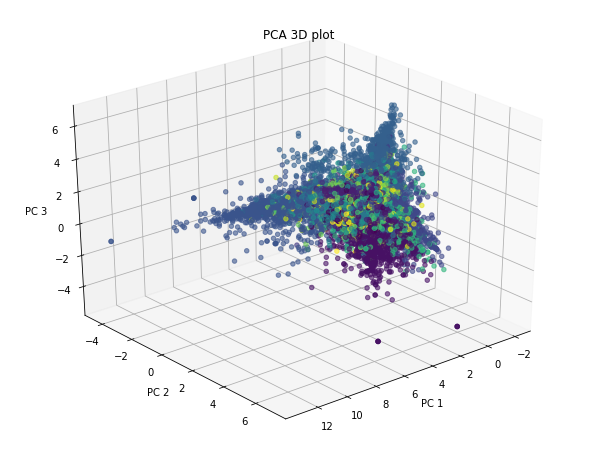

In [66]:
fig=pylab.figure(figsize=(8,6))
ax=Axes3D(fig)

ax.view_init(30,50)
ax.scatter(newdata[:,0],newdata[:,1],newdata[:,2],c=newdata_df['cluster'],alpha=0.6)
ax.set_xlabel('PC 1')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PCA 3D plot')
#pylab.legend([yellow_dot,green_dot,purple_dot],['cluster 0','cluster 1','cluster 2'])
pylab.draw()
#fig.savefig('pca3d.png',dpi=500)

In [29]:
#cluster_colors={0: '#7570b3', 1: 'orange', 2: '#66a61e'}

#cluster_names={0:'technology',
 #             1:'donation',
  #            2:'entertainment'}

In [68]:
%matplotlib inline
x=newdata[:,0]
y=newdata[:,1]
dataset=dict(x=x,y=y, label=clusters,text=corpus)

In [69]:
pca_df=pd.DataFrame(dataset)
groups = pca_df.groupby('label')

In [70]:
groups.x

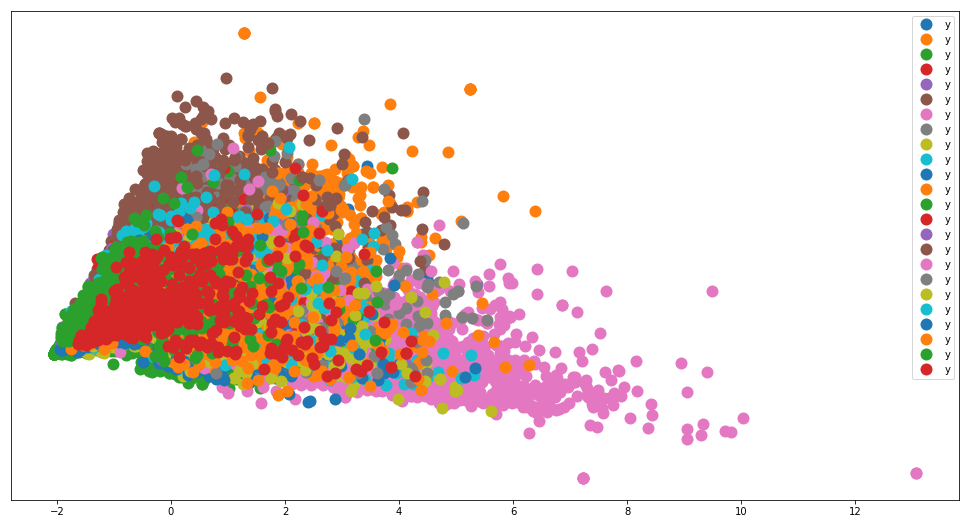

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(17,9))
ax.margins(0.05)

for name, group in groups:
    ax.plot(group['x'], group['y'], marker='o', linestyle='', ms=12, mec='none')
            #,color=cluster_colors)
    ax.set_aspect('auto')
    ax.tick_params(axis='x',
                  which='which',
                  bottom='off',
                  top='off',
                  labelbottom='off')
    ax.tick_params(axis='y',
                 which='both',
                  left='off',
                  top='off',
               labelleft='off')
ax.legend(numpoints=1)

#for i in range(len(pca_df)):
 #   ax.text(pca_df['x'][i],pca_df['y'][i],df['text'][i],size=8)
    
plt.show()

In [73]:
import matplotlib.pyplot as plt
class TopToolbar(mpld3.plugins.PluginBase):
    """移动工具栏到分布图顶部的插件"""
 
    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
 
    TopToolbar.prototype.draw = function(){
      //  还缺少工具栏 svg，因此一开始要绘制
      this.fig.toolbar.draw();
 
      // 接着把 y 的位置变为图顶部
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);
 
      // 再移除 draw 函数，防止被调用
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [78]:
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}
 
g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }
 
svg.mpld3-figure {
margin-left: -200px;}
"""
 

fig, ax = plt.subplots(figsize=(14,6)) 
ax.margins(0.03)
 


for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=15, 
                      mec='none', 
                     color=newdata_df['cluster'],alpha=0.8)
    ax.set_aspect('auto')
    labels = [i for i in group.text]
 
    
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
 
    
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
 
    
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
 
 
ax.legend(numpoints=1) 
 
mpld3.display() 
 

ValueError: RGBA sequence should have length 3 or 4

In [63]:
from scipy.cluster.hierarchy import ward, dendrogram

In [ ]:
linkage_matrix = ward(dist)

In [ ]:
fig,ax = plt.subplots(figsize=(15,20))
ax=dendrogram(linkage_matrix, orientatioin='right',labels=text)

plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off',
    labelbottom='off')

plt.tight_layout()